In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<h3>EDA</h3>

<Axes: ylabel='cuisine'>

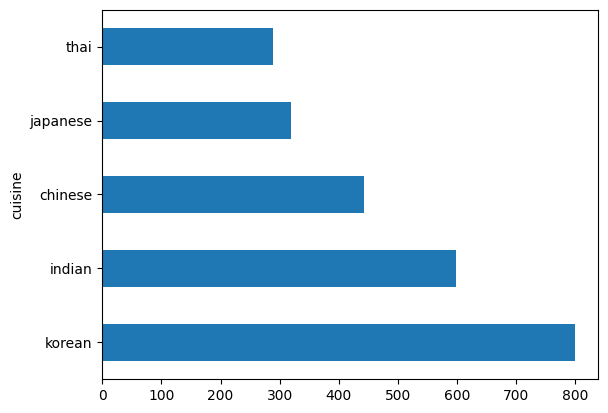

In [4]:
df.cuisine.value_counts().plot.barh()

Find out how much data is available per cuisine and print it out

In [5]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


<h4> Discovering ingredients </h4>

Now we can dig deeper into the data and learn what are typical ingridients per cuisines. 

In [6]:
test = df.T
test.head()

,0,1,2,3,4,5,6,7,8,9,...,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447
Unnamed: 0,65,66,67,68,69,70,71,72,73,74,...,57681,57682,57683,57684,57685,57686,57687,57688,57689,57690
cuisine,indian,indian,indian,indian,indian,indian,indian,indian,indian,indian,...,japanese,japanese,japanese,japanese,japanese,japanese,japanese,japanese,japanese,japanese
almond,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
angelica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.drop(['cuisine','Unnamed: 0'], inplace=True)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447
almond,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
angelica,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anise_seed,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
apple,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test = test.sum(axis=1).to_frame('value')
test.head()

,value
almond,45
angelica,0
anise,1
anise_seed,7
apple,34


In [9]:
# drop any rows with 0
test = test[(test.T != 0).any()]
test.head()

,value
almond,45
anise,1
anise_seed,7
apple,34
apricot,13


In [10]:
# sort by value descending
test = test.sort_values(by='value', ascending=False, inplace=False)
test.head()

,value
garlic,1226
soy_sauce,979
cayenne,975
ginger,907
scallion,844


In [11]:
# CREATE A FUNCTION TO DROP UNHELPFUL COLUMNS, THEN SORT INGREDS BY COUNT
def create_ingredients(df):
    ingredient_df = df.T.drop(['cuisine', 'Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)    
    return ingredient_df


Now check every cuisines ingridients

In [12]:
thai_ingredient = create_ingredients(thai_df)
japanese_ingredient = create_ingredients(japanese_df)
chinese_ingredient = create_ingredients(chinese_df)
indian_ingredient = create_ingredients(indian_df)
korean_ingredient = create_ingredients(korean_df)

In [17]:
thai_ingredient.head().sort_values(by='value', ascending=False)

,value
garlic,173
fish,153
cayenne,136
cilantro,121
ginger,114


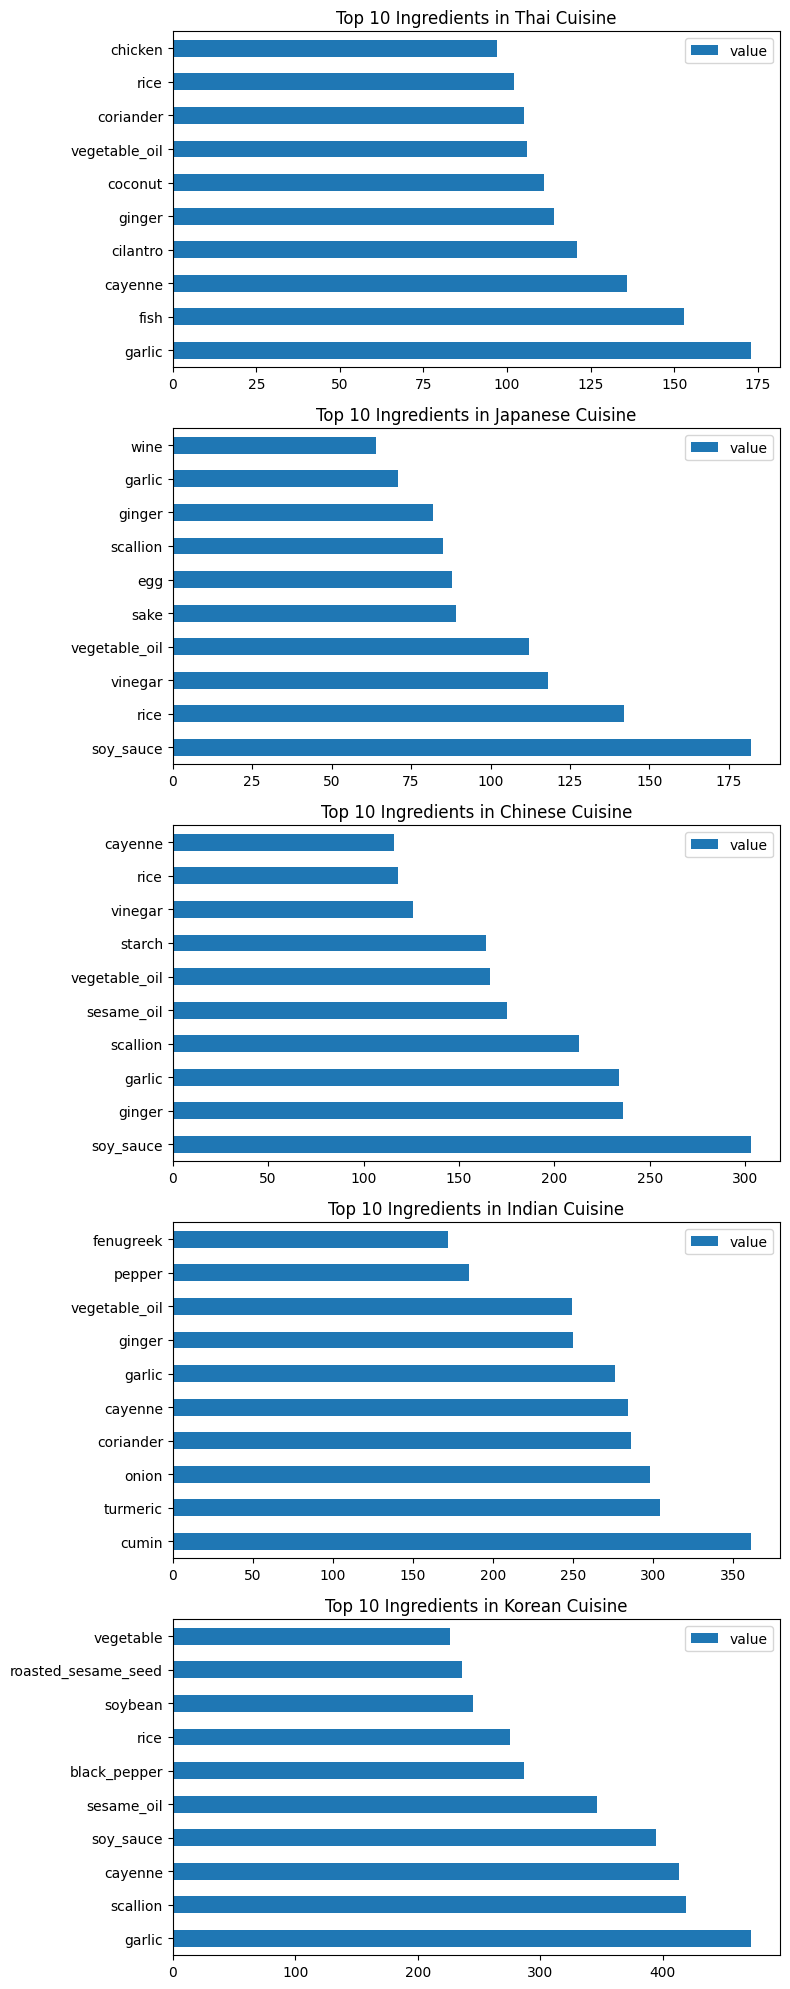

In [15]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8, 20))

thai_ingredient.head(10).plot.barh(ax=ax[0])
japanese_ingredient.head(10).plot.barh(ax=ax[1])
chinese_ingredient.head(10).plot.barh(ax=ax[2])
indian_ingredient.head(10).plot.barh(ax=ax[3])
korean_ingredient.head(10).plot.barh(ax=ax[4])

ax[0].set_title('Top 10 Ingredients in Thai Cuisine')
ax[1].set_title('Top 10 Ingredients in Japanese Cuisine')
ax[2].set_title('Top 10 Ingredients in Chinese Cuisine')
ax[3].set_title('Top 10 Ingredients in Indian Cuisine')
ax[4].set_title('Top 10 Ingredients in Korean Cuisine')

plt.tight_layout()
plt.show()

<h3>From the Insight that we have found. Now, drop the most common ingredients that create confusion between distinct cuisines

In [19]:
# everyone loves rice, garlic, and ginger
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<h3>BALANCE THE DATASET</h3>
After cleaned the data, use SMOTE - "Synthetic Minority Over-Sampling Technique" to balance it

By balancing your data, you'll have better results when classifying it. Think about a binary classification. If most of your data is one class, a ML model is going to predict that class more frequently, just because there is more data for it. Balancing the data takes any skewed data and helps remove this imbalance.

In [21]:
oversample = SMOTE()
transformed_feature, transformed_label = oversample.fit_resample(feature_df, labels_df)

print(f'new label count: {transformed_label.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


The last step is saving balanced data, including labels and features, into a new dataframe that can be exported into a file

In [23]:
transformed_df = pd.concat([transformed_feature, transformed_label], axis=1, join='outer')
transformed_df.head()
transformed_df.info()
transformed_df.to_csv("cleaned_cuisines.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Columns: 381 entries, almond to cuisine
dtypes: int64(380), object(1)
memory usage: 11.6+ MB
